# Joshua Milliken

## Best Inequality Statistic for Corruption Perception Predictions

Looking at many inequality indicators and finding which has the highest correlation with the Corruption Perception Index (CPI).

In [1]:
import pandas as pd
import datapackage
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from project_functions1 import load_and_process, scatter_plot1, sp50, cpi_timeseries, cpi_year

## Exploritory Analysis

In [2]:
CID = load_and_process()

In [3]:
CID.to_csv('CID.csv')

In [4]:
print("Number of rows and columns:", CID.shape)
print(f"Number of Countries: {CID['country'].nunique()}")

Number of rows and columns: (7344, 7)
Number of Countries: 24


In [5]:
CID.head()

,country,variable,percentile,year,value,age,pop
0,SC,sptinc992j,p90p100,1998,0.5271,992,j
1,MU,sptinc992j,p90p100,1998,0.4578,992,j
2,DZ,sptinc992j,p90p100,1998,0.4193,992,j
3,TN,sptinc992j,p90p100,1998,0.4888,992,j
4,BW,sptinc992j,p90p100,1998,0.6949,992,j


In [6]:
CID.describe()

,country,variable,percentile,year,value,age,pop
count,7344,7344,7344,7344,7344,7344,7344
unique,24,5,6,18,2694,3,3
top,SC,sptinc992j,p0p100,1998,-,992,i
freq,306,1728,5184,408,69,5184,5184


### From this we can see that there are 69 missing values denoted by '-'
### sptinc992j being the most common variable because it denotes all the percentages
### age and population are mostly irrelavent and are usefull mostly for standardizing concatinations

## Correlation between Share of national income and perceptions of inequality
### Top 1%

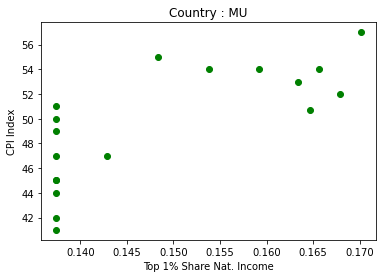

In [7]:
scatter_plot1()

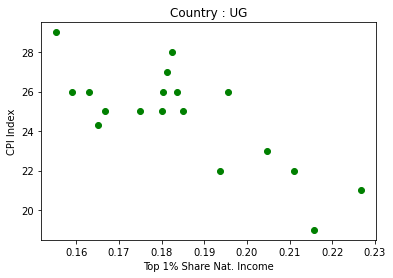

In [8]:
scatter_plot1('UG')

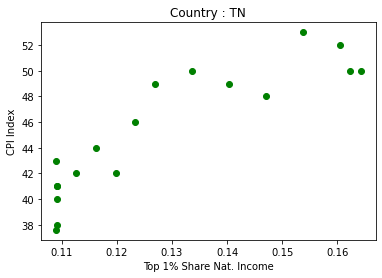

In [9]:
scatter_plot1('TN')

### From the selected countries, there is no clear correlation between CPI and percentage of national income that the top 1% have

### Bottom 50 %

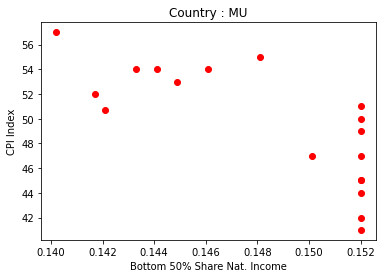

In [10]:
sp50()

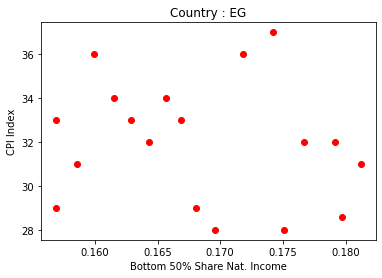

In [11]:
sp50('EG')

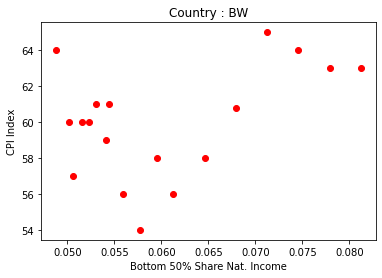

In [12]:
sp50('BW')

### From the selected countries, there is no clear correlation between CPI and percentage of national income that the bottom 50% have

In [13]:
'''CPI = CID.loc[CID['variable'] == 'CPI']
sns.set_theme(style = "ticks")
ax = sns.catplot(x='year', y='value', hue = "country", data = CPI, kind = 'bar')
ax.fig.set_size_inches(20,20) '''

## This doesn't work rn, trying to get timeseries with all countries combined

'CPI = CID.loc[CID[\'variable\'] == \'CPI\']\nsns.set_theme(style = "ticks")\nax = sns.catplot(x=\'year\', y=\'value\', hue = "country", data = CPI, kind = \'bar\')\nax.fig.set_size_inches(20,20) '

## Changes in Corruption Pereception Index over time

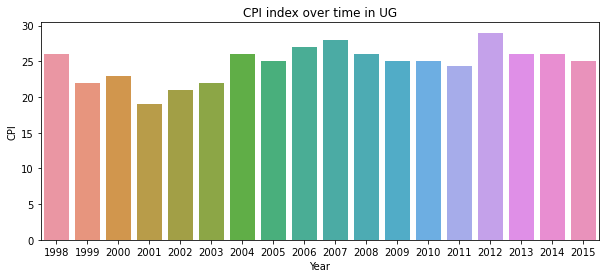

In [14]:
cpi_timeseries()

### The country SC-Seychelles is showing a move towards higher perceptions of inequality

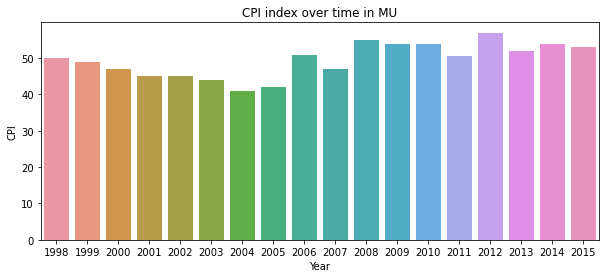

In [15]:
cpi_timeseries('MU')

### The country MU-Mauritius does not have any clear trend in CPI

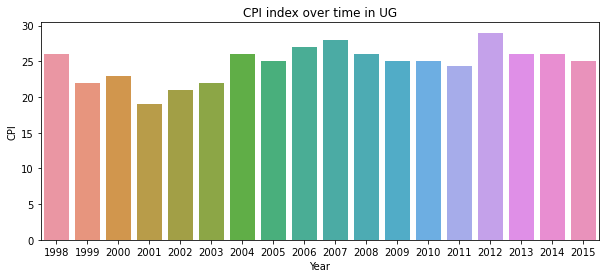

In [16]:
cpi_timeseries('UG')

### The country of UG-Uganda does not clearly have a trend in CPI

## Corruption Perception Index in every country in select year

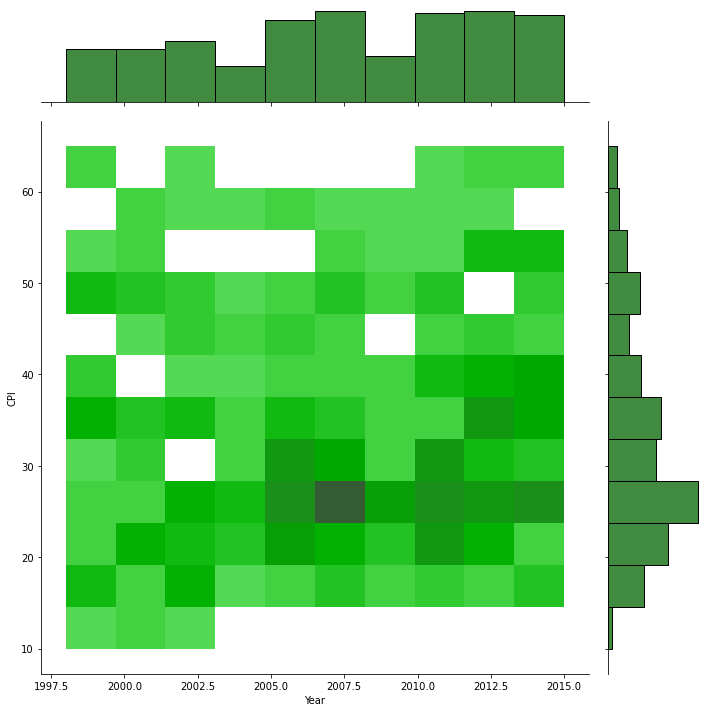

In [17]:
CPI = CID.loc[CID['variable'] == 'CPI'].reset_index(drop=True).drop_duplicates()
CPI = CPI[CPI.value != '-']
cpiy = sns.jointplot(x = CPI['year'], y = CPI['value'], kind = 'hist', color = 'darkgreen', ratio = 5, height = 10)
cpiy.set_axis_labels('Year', 'CPI')


AttributeError: 'AxesSubplot' object has no attribute 'color_palette'

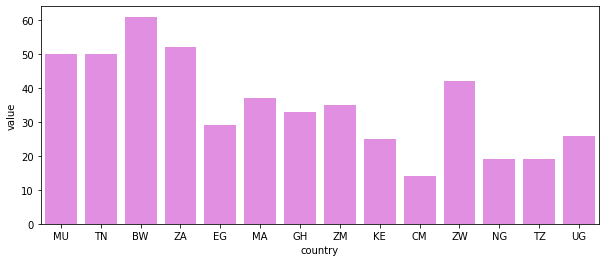

In [18]:
cpi_year(1998)

### In 1998, it appears that CM-Cameroon has the lowest CPI, BW-Botswana has the highest, and average CPI is about 30
### There are a lot of missing countries indicating there were missing values for this year

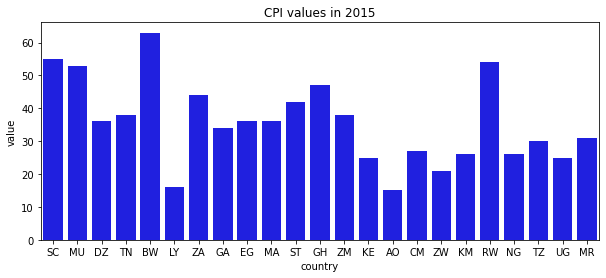

In [ ]:
cpi_year()

### In 2015, the trends layed out in 1998 remain the same, however AO-Angola or LY-Lybia is the lowest as thye is not missing
### This is a more complete dataset

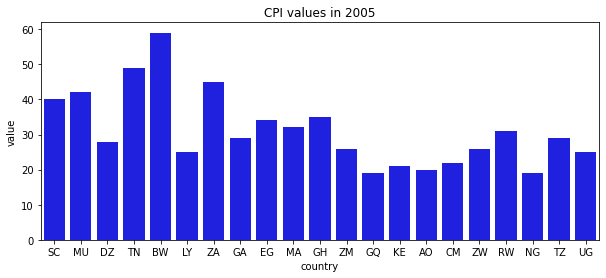

In [ ]:
cpi_year(2005)

### There are still some missing countries in 2005
### Overall trennds remain the same if not converge to the averga around 25-30 for CPI

There is not any clear trend overall over time in CPI. However, this does show clearly show that CPI is moslty around 15 to 40. This is more true for more recent years. From the distribution of the year can be seen that simply more countries have data latter in time. 

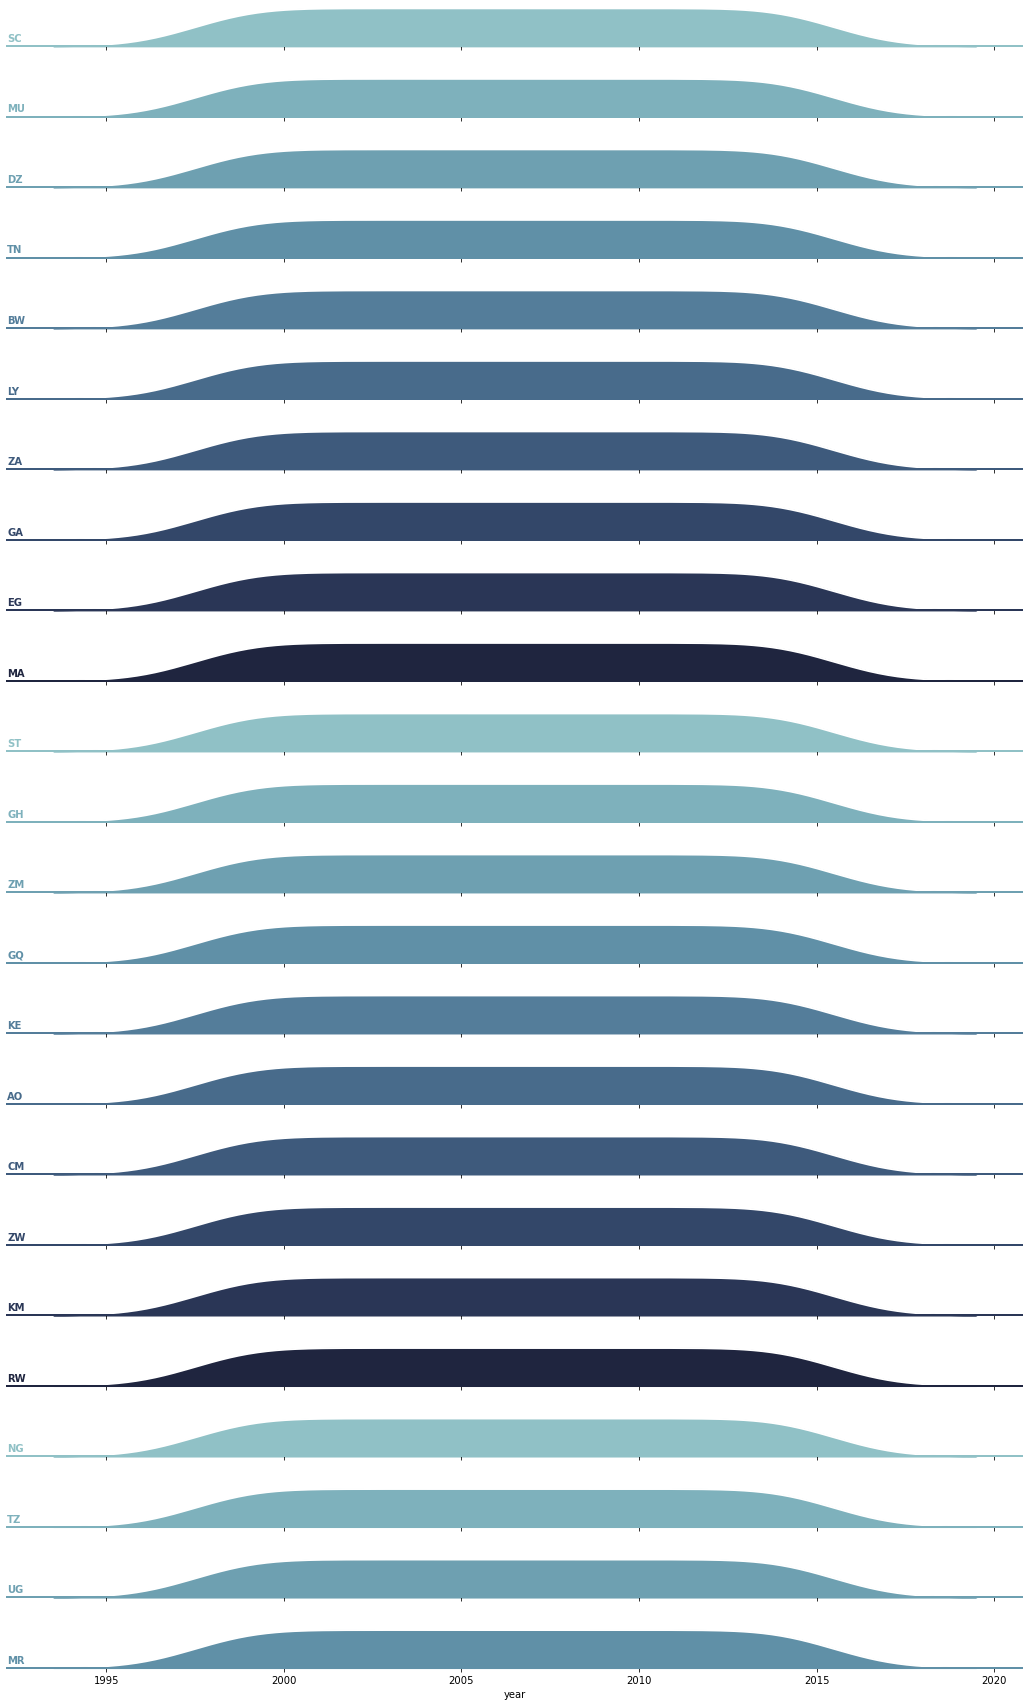

In [ ]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data = CID.loc[CID['variable'] == "CPI"], row="country", hue="country", aspect=15, height=1, palette=pal)

g.map(sns.kdeplot, "year",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "year", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "year")

#g.figure.subplots_adjust(hspace=-.25)

g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)